In [ ]:
import pandas as pd

In [ ]:
import random
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import cv2
import torch
import torchaudio
from torchaudio import transforms
import sklearn
import librosa.display
import os

In [ ]:
import soundfile as sf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2,os

data_path = '/content/drive/My Drive/SHREYA_CAPSTONE/data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'drunk ': 0, 'sober': 1}
['drunk ', 'sober']
[0, 1]


In [ ]:
!unzip -u "/content/drive/My Drive/SHREYA_CAPSTONE/dataset.zip" -d "/content/data"

Archive:  /content/drive/My Drive/SHREYA_CAPSTONE/dataset.zip
   creating: /content/data/dataset/fold1/
  inflating: /content/data/dataset/fold1/D1.wav  
  inflating: /content/data/dataset/fold1/D10.wav  
  inflating: /content/data/dataset/fold1/D100.wav  
  inflating: /content/data/dataset/fold1/D101.wav  
  inflating: /content/data/dataset/fold1/D102.wav  
  inflating: /content/data/dataset/fold1/D103.wav  
  inflating: /content/data/dataset/fold1/D104.wav  
  inflating: /content/data/dataset/fold1/D105.wav  
  inflating: /content/data/dataset/fold1/D106.wav  
  inflating: /content/data/dataset/fold1/D107.wav  
  inflating: /content/data/dataset/fold1/D108.wav  
  inflating: /content/data/dataset/fold1/D109.wav  
  inflating: /content/data/dataset/fold1/D11.wav  
  inflating: /content/data/dataset/fold1/D110.wav  
  inflating: /content/data/dataset/fold1/D111.wav  
  inflating: /content/data/dataset/fold1/D112.wav  
  inflating: /content/data/dataset/fold1/D113.wav  
  inflating: /co

In [ ]:
data=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    class_names=os.listdir(folder_path)

    for img_name in class_names:
        img_path=os.path.join(folder_path,img_name)
        sf.SoundFile(path) as sf_desc:
        sr_native = sf_desc.samplerate

SyntaxError: ignored

In [ ]:
path = '/content/data/dataset/fold1/D1.wav'

In [ ]:
x, sr = librosa.load(path, sr=None)

mean, standard deviation, minimum, maximum, median and quartiles of the frequencies of each signal.

In [ ]:
freqs = np.fft.fftfreq(x.size)

def describe_freq(freqs):
    mean = np.mean(freqs)
    std = np.std(freqs)
    maxv = np.amax(freqs)
    minv = np.amin(freqs)
    median = np.median(freqs)
    skew = scipy.stats.skew(freqs)
    kurt = scipy.stats.kurtosis(freqs)
    q1 = np.quantile(freqs, 0.25)
    q3 = np.quantile(freqs, 0.75)
    mode = scipy.stats.mode(freqs)[0][0]
    iqr = scipy.stats.iqr(freqs)

    return [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

In [ ]:
describe_freq(x)

[-5.8911846e-06,
 0.058755428,
 0.35679626,
 -0.4055481,
 0.0,
 -0.24522821883923715,
 4.349754597304599,
 -0.012451171875,
 0.010009765625,
 0.0,
 0.0224609375]

Energy

In [ ]:
def e(x):
  return np.sum(x**2)

e(x)

1491.7926

Root Mean Square Energy

In [ ]:
def rmse(x):
    return np.sqrt(np.mean(x**2))

rmse(x)

0.05875543

zero crossing

21133

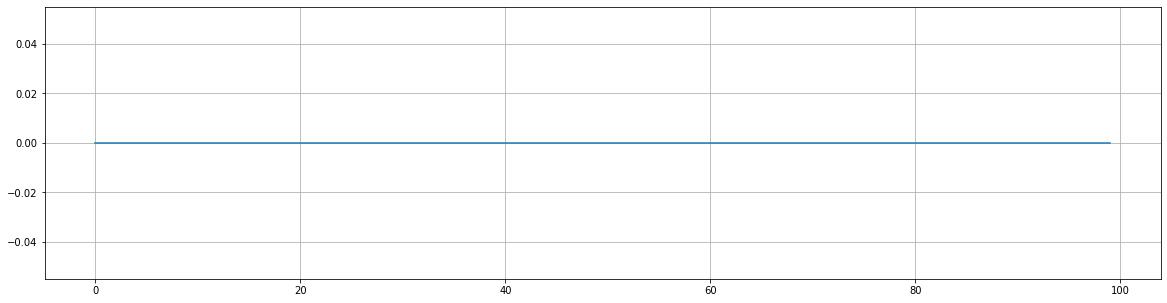

In [ ]:
zero_crossings = sum(librosa.zero_crossings(x, pad=False))
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings

In [ ]:
tempo = librosa.beat.tempo(x)[0]

tempo

129.19921875

The polyfeatures returns the coefficients of fitting an nth-order polynomial to the columns of a spectrogram

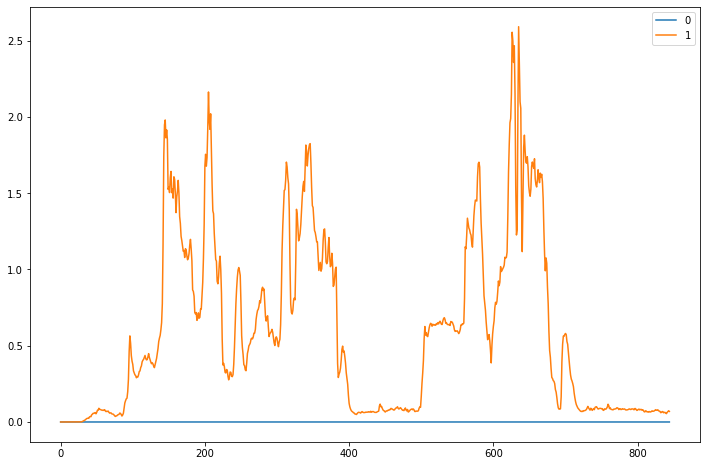

In [ ]:
poly_features=librosa.feature.poly_features(x) #order 1 by default


plt.figure(figsize=(12,8))
plt.plot(poly_features[0], label="0")
plt.plot(poly_features[1], label="1")
plt.legend()
plt.show()

The tempo, measured in Beats Per Minute (BPM) measures the rate of the musical beat. The tempogram is a feature matrix which indicates the prevalence of certain tempi at each moment in time.

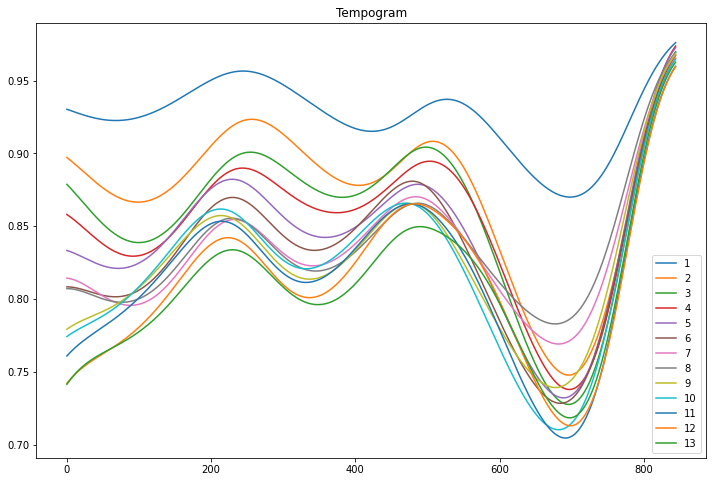

In [ ]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

plt.figure(figsize=(12,8))
for i in range(1,14):
    plt.plot(tempogram[i], label=i)
plt.legend()
plt.title("Tempogram")
plt.show()

Each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame.

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(845,)

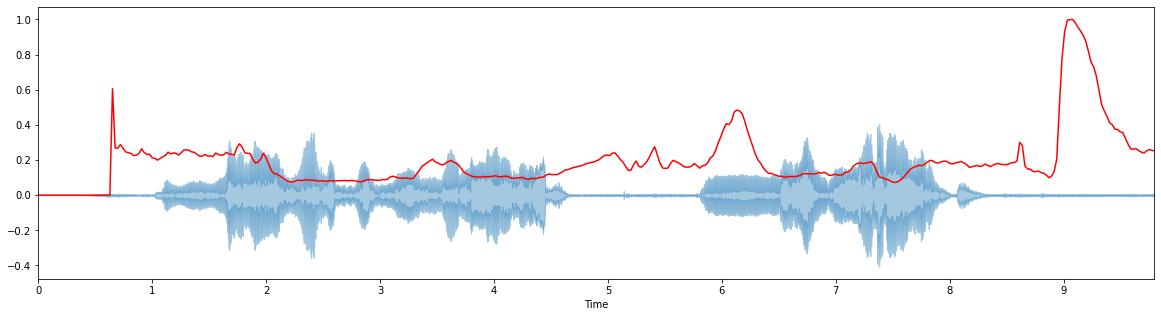

In [ ]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

Spectral Rolloff

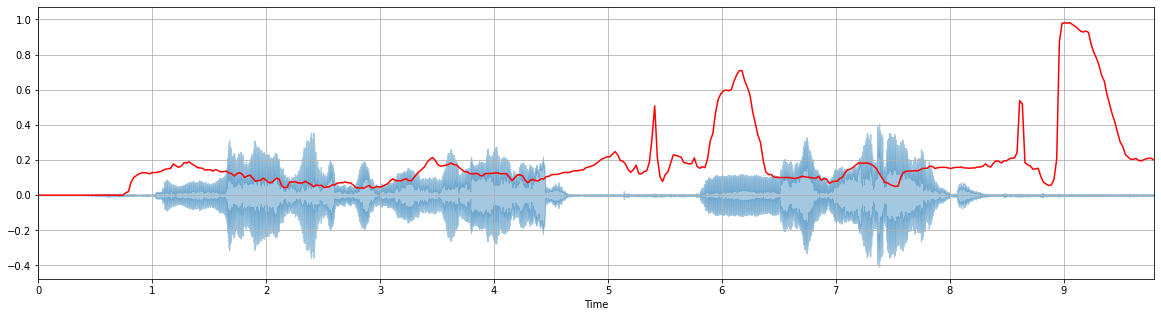

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

MFCC

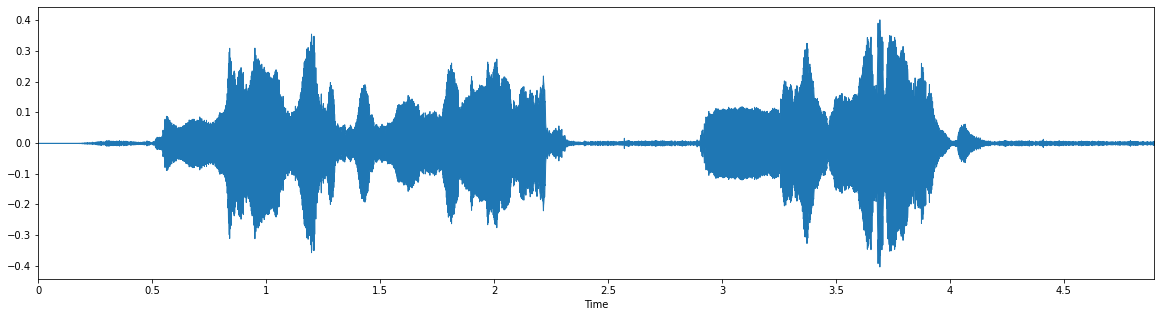

In [ ]:
plt.figure(figsize=(20,5))
x, fs = librosa.load(path)
librosa.display.waveplot(x, sr=sr)

(20, 423)


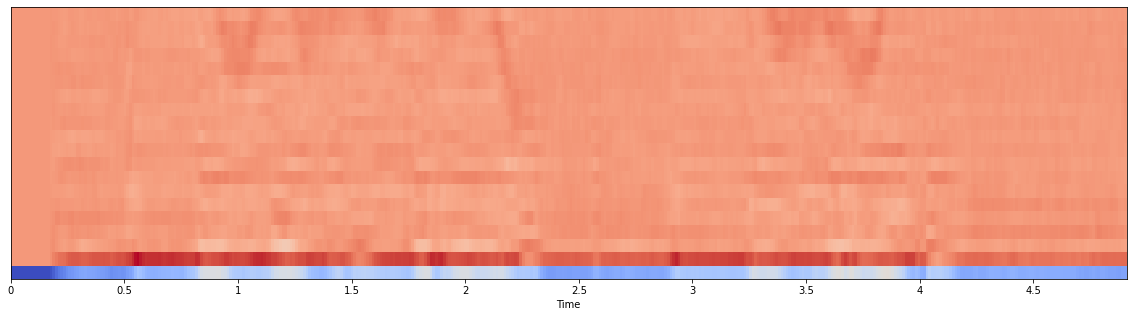

In [ ]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Feature Scaling


Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-9.0181969e-09  0.0000000e+00 -6.7636474e-09 -1.8036394e-08
  0.0000000e+00 -9.0181969e-09  1.8036394e-08  4.5090984e-09
 -9.0181969e-09 -1.3527295e-08 -1.8036394e-08  4.5090984e-09
  4.5090984e-09 -4.5090984e-09  0.0000000e+00 -4.5090984e-09
  0.0000000e+00  0.0000000e+00  3.3818237e-09 -1.3527295e-08]
[1.         1.0000001  1.         1.         1.         0.99999994
 1.0000001  1.0000001  1.         1.         0.99999994 0.9999999
 0.99999994 0.99999994 1.0000001  1.0000001  1.0000001  1.
 0.99999994 1.0000001 ]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


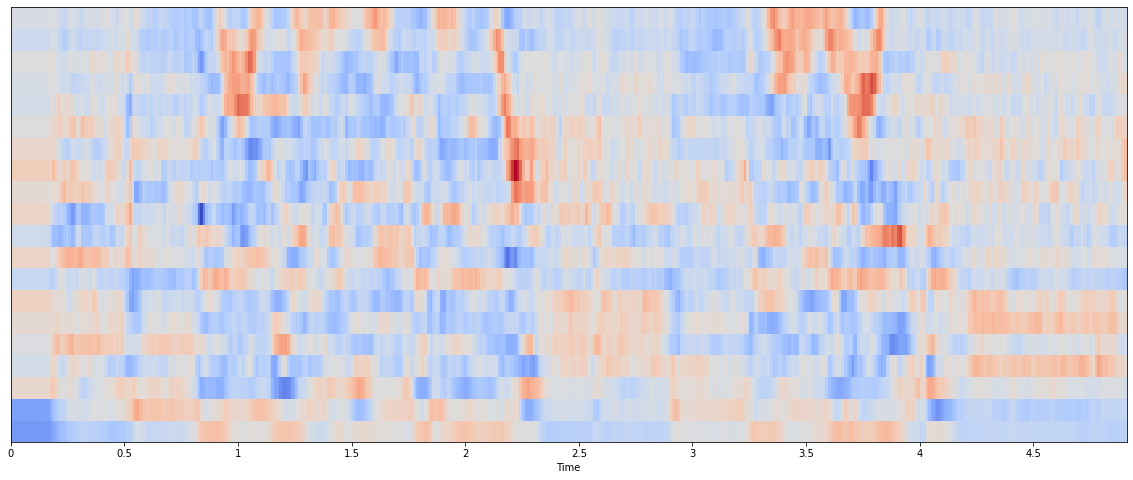

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Chroma Frequencies

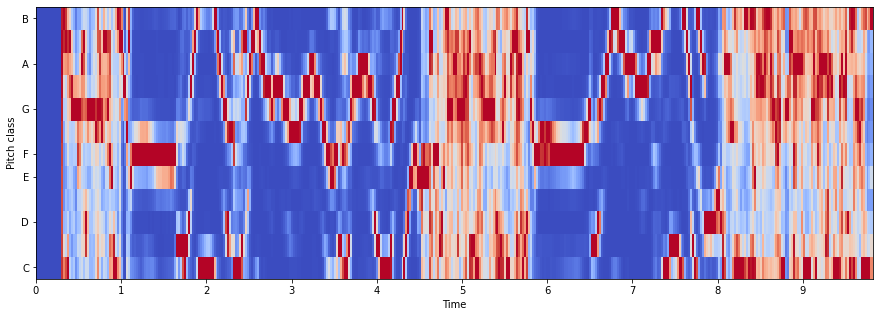

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')